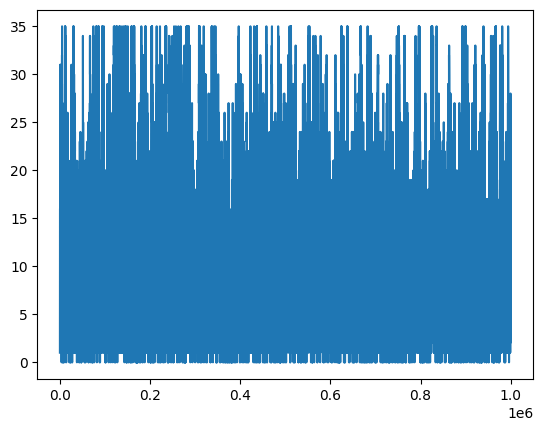

In [96]:
from matplotlib import pyplot as plt
import csv


data = []

with open('../10.000.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)
        
# remove header
data = data[1:]

    
seconds = [float(row[0]) for row in data]
requests_in_system = [int(row[1]) for row in data]
queue_length_mean = [float(row[3]) for row in data]
waiting_mean = [float(row[2]) for row in data]


plt.plot(seconds, requests_in_system)
plt.savefig('10_000_seconds-requests_in_system.png')

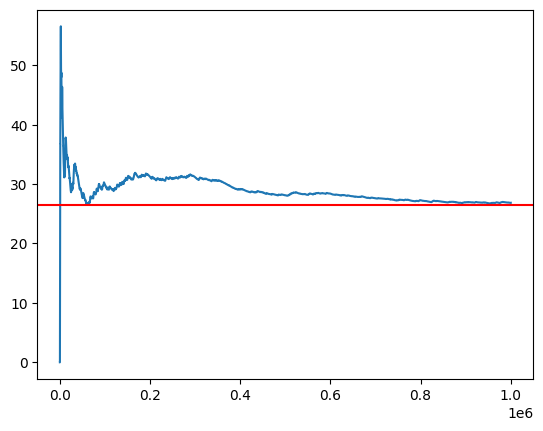

In [101]:
plt.plot(seconds, waiting_mean)
plt.axhline(y=26.44710565236945, color='r', linestyle='-')
# plt.savefig('10_000_seconds-waiting_mean.png')

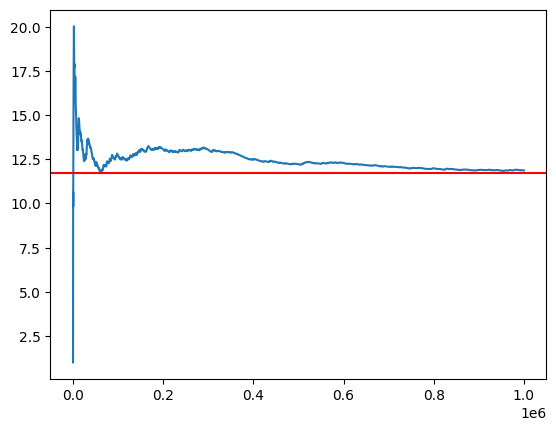

In [105]:
plt.plot(seconds, queue_length_mean)
plt.axhline(y=11.75, color='r', linestyle='-')
plt.savefig('1_000_000_seconds-queue_length_mean.png')

In [99]:
import math

def p_0(lambda_, mu, K, c):
    return (sum([lambda_**k / (mu**k * math.factorial(k))
                 for k in range(c + 1)])
            + lambda_**c / (mu**c * math.factorial(c)) 
            * sum([lambda_**(k - c) / (mu**(k-c) * c**(k-c))
                   for k in range(c + 1, K + 1)]))**(-1)

def W(lambda_, mu, K, c):
    p = p_0(lambda_, mu, K, c)
    print(f"{p=}")

    ro = lambda_ / (c * mu)
    print(f"{ro=}")
    
    return 1/mu + p * (ro * (ro * c)**c)/(lambda_ * (1-ro)**2 * math.factorial(c))

def W_q(lambda_, mu, K, c):
    return W(lambda_, mu, K, c) - 1/mu

def Theta(lambda_, mu, K, c):
    w = W(lambda_, mu, K, c)
    print(f"{w=}")
    return w * lambda_

print(W_q(1/4, 1/19, 30, 5))

theta = Theta(1/4, 1/19, 30, 5)
print(theta)

p=0.002833553422629232
ro=0.9500000000000001
86.7884226094778
p=0.002833553422629232
ro=0.9500000000000001
w=105.7884226094778
26.44710565236945
